# Map of correlations

In [5]:
import xarray as xr
from pathlib import Path

import intake
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs

import numpy as np
import pandas as pd
import os

/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [6]:

# define paths
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'P1D'
zoom = 'z5'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

ds_jja = ds.sel(time=ds['time'].dt.month.isin([6, 7, 8]))

clivi: cloud ice path
clt: total cloud cover
clwvi: cloud condensed water path
egpvi: Atmosphere Geopotential Energy Content
einvi: Atmosphere Moist Internal Energy Content
ekhvi: Atmosphere Horizontal Kinetic Energy Content
ekvvi: Atmosphere Vertical Kinetic Energy Content
hflsd: latent heat flux
hfssd: sensible heat flux
hur: relative humidity
hus: Specific humidity
huss: specific humidity in 2m
mrso: Water content of soil layers
o3vi: ozone path
orog: surface altitude
pr: precipitation flux
prs: large-scale precipitation flux (snow)
prw: water vapor path
ps: surface pressure
psl: mean sea level pressure
qall: mass fraction of all hydrometeors in air
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rlut: toa outgoing longwave radiation
rlutcs: toa outgoing clear-sky longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rs

In [7]:
#calculate evapotranspiration 
icon_evap = (ds_jja['hflsd']*86400 )/2.45e6

In [8]:
icon_pr = ds_jja['pr'].mean('time')* 86400

In [10]:
icon_y1  = xr.where( (icon_pr>=.1)&(ds_jja['sftlf']>0.1), icon_evap, np.nan)

icon_corr_evap_pr      = xr.where((icon_pr>=.1)&( ds_jja['sftlf'] >0.1), 
                                xr.corr(ds_jja['pr'], icon_y1, dim='time'), np.nan) #.values

/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


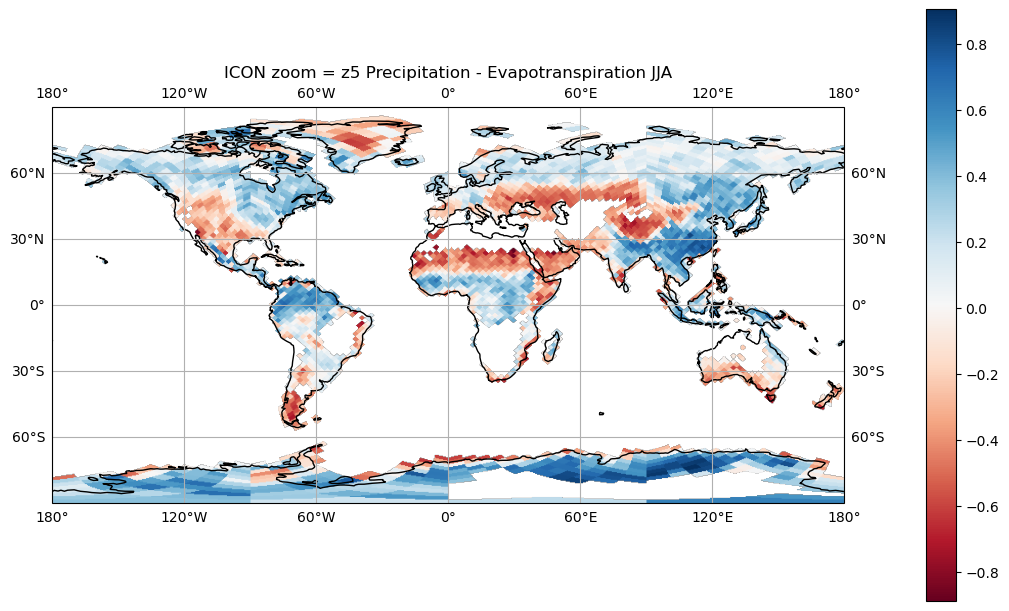

/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/dask/_task_spec.py:758: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/dask/_task_spec.py:758: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/scratch/nf33/public/minic

In [11]:
# correlation map of precipitation and evapotranspiration

plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_evap_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom} Precipitation - Evapotranspiration JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

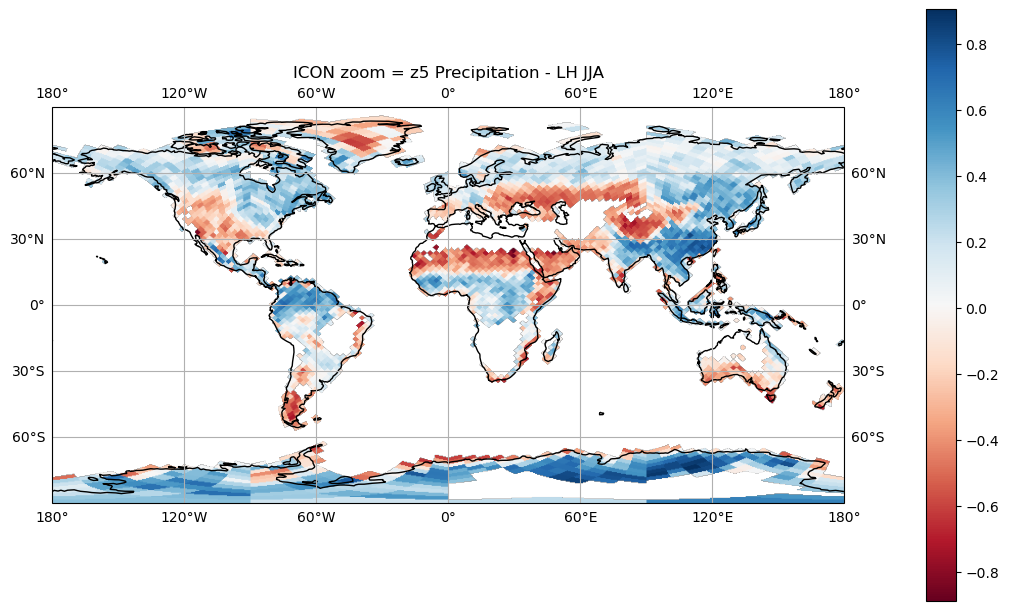

In [13]:
# latent heat

icon_y1  = xr.where( (icon_pr>=.1)&(ds_jja['sftlf']>0.1), ds['hflsd'], np.nan)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&( ds_jja['sftlf'] >0.1), 
                                xr.corr(ds_jja['pr'], icon_y1, dim='time'), np.nan) #.values
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom} Precipitation - LH JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

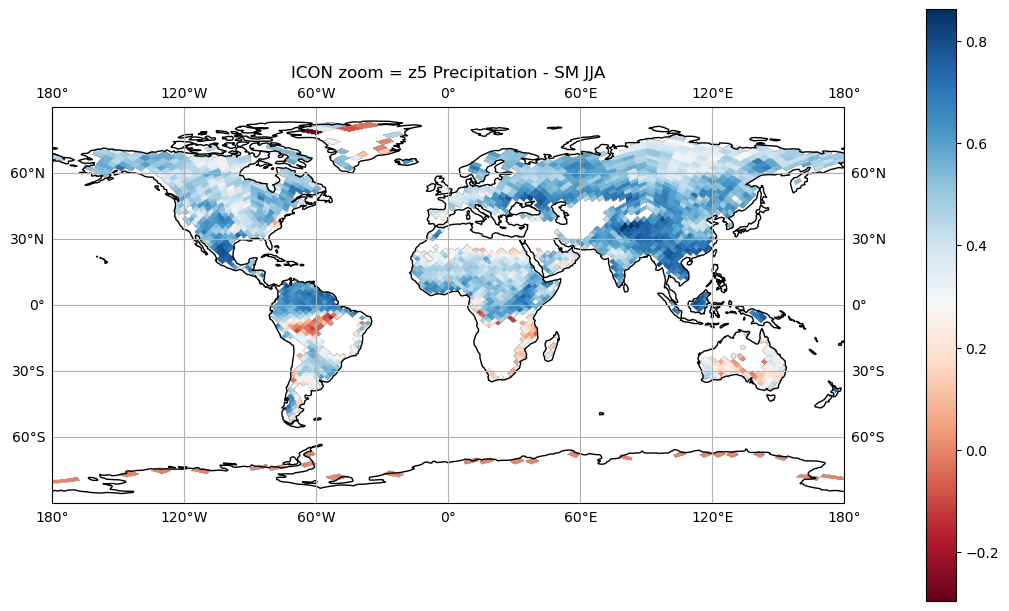

In [15]:
# correlation map of precipitation and soil moisture

icon_sm = xr.where( (icon_pr>=.1)&(ds_jja['sftlf']>0.9), ds_jja['mrso'].isel(soil_level=0), np.nan)
icon_corr_sm_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds_jja['pr'], icon_sm, dim='time'), np.nan) #.values

plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_sm_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom} Precipitation - SM JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

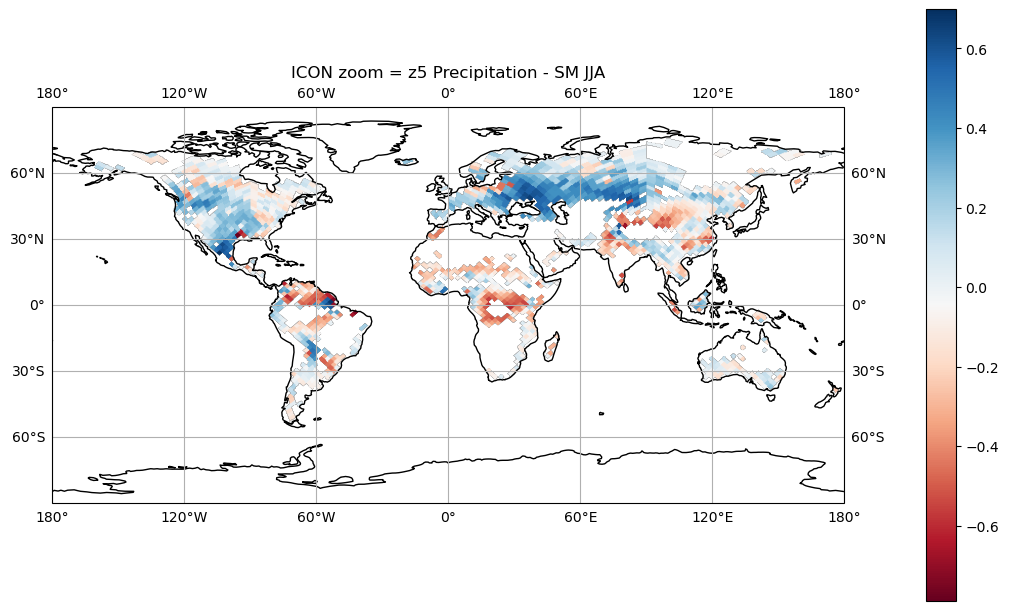

In [34]:
# correlation map of precipitation and soil moisture zoom = 5
# define paths
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'P1D'
zoom = 'z5'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

ds_jja = ds.sel(time=ds['time'].dt.month.isin([6, 7, 8]))
icon_pr = ds_jja['pr'].mean('time')* 86400

icon_sm = xr.where( (icon_pr>=.1)&(ds_jja['sftlf']>0.9), ds_jja['mrso'].isel(soil_level=4), np.nan)
icon_corr_sm_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds_jja['pr'], icon_sm, dim='time'), np.nan) #.values

plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_sm_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom} Precipitation - SM JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

In [35]:
# UM model

# define paths
datapath = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/'
model = 'UM'
zoom = 'z5'
#fpath = f'{datapath}{model}/data.healpix.PT1H.{zoom}.zarr'
fpath = f'{datapath}/data.healpix.PT1H.{zoom}.zarr'

# open the zarr file
dum = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in dum.data_vars.items():
    print(f'{key}: {longname.long_name}')


clivi: atmosphere_mass_content_of_cloud_ice
clt: cloud_area_fraction
clwvi: atmosphere_mass_content_of_cloud_condensed_water
hflsd: surface_downward_latent_heat_flux
hfssd: surface_downward_sensible_heat_flux
huss: specific_humidity
pr: precipitation_flux
prs: solid_precipitation_flux
prw: atmosphere_mass_content_of_water_vapor
ps: surface_air_pressure
psl: air_pressure_at_mean_sea_level
rlds: surface_downwelling_longwave_flux_in_air
rldscs: surface_downwelling_longwave_flux_in_air_clear_sky
rlut: toa_outgoing_longwave_flux
rlutcs: toa_outgoing_longwave_flux_clear_sky
rsds: surface_downwelling_shortwave_flux_in_air
rsdscs: surface_downwelling_shortwave_flux_in_air_clear_sky
rsdt: toa_incoming_shortwave_flux
rsut: toa_outgoing_shortwave_flux
rsutcs: toa_outgoing_shortwave_flux_clear_sky
tas: air_temperature
ts: surface_temperature
uas: eastward_wind
vas: northward_wind


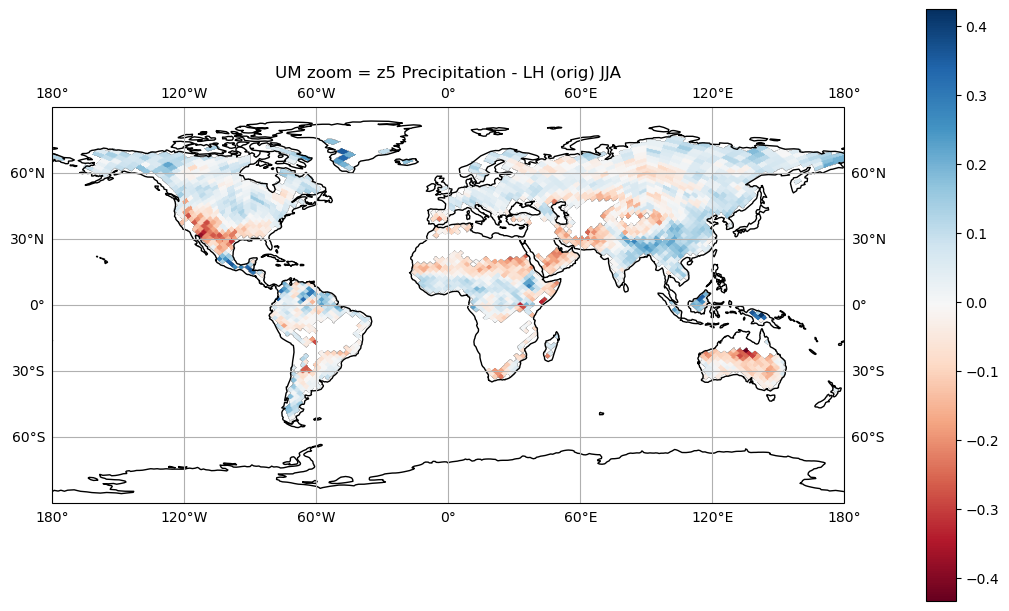

In [42]:
dum_jja = dum.sel(time=dum['time'].dt.month.isin([6, 7, 8]))
icon_pr = dum_jja['pr'].mean('time')* 86400

# latent heat

icon_y1  = xr.where( (icon_pr>=.1)&(ds_jja['sftlf']>0.9), dum['hflsd'], np.nan)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&(ds_jja['sftlf']>0.9), 
                                xr.corr(dum_jja['pr'], icon_y1, dim='time'), np.nan) #.values
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'{model} zoom = {zoom} Precipitation - LH (orig) JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

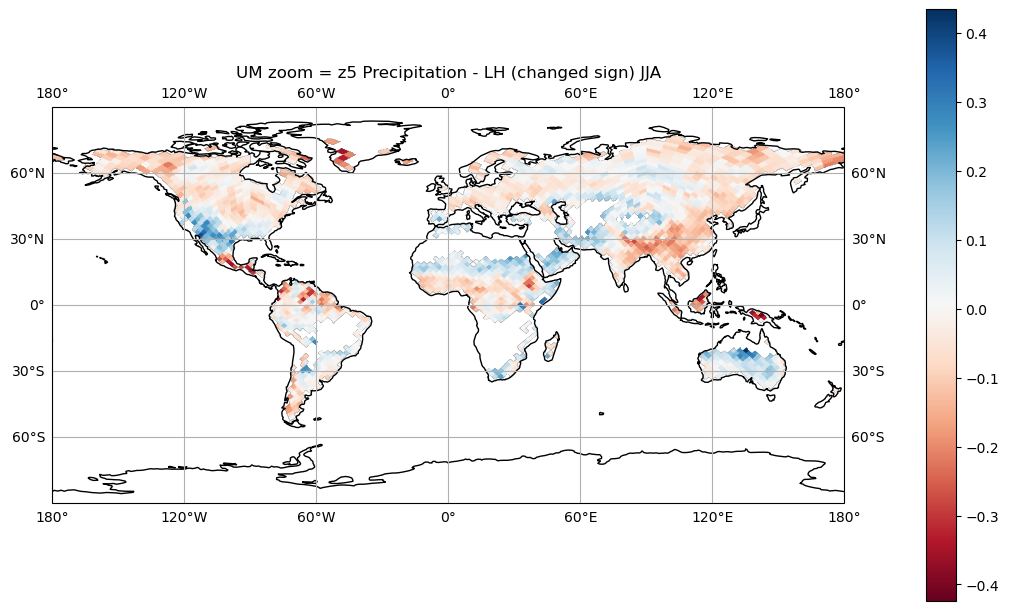

In [41]:
dum_jja = dum.sel(time=dum['time'].dt.month.isin([6, 7, 8]))
icon_pr = dum_jja['pr'].mean('time')* 86400

# latent heat

icon_y1  = xr.where( (icon_pr>=.1)&(ds_jja['sftlf']>0.9), dum['hflsd']*-1, np.nan)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&(ds_jja['sftlf']>0.9), 
                                xr.corr(dum_jja['pr'], icon_y1, dim='time'), np.nan) #.values
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'{model} zoom = {zoom} Precipitation - LH (changed sign) JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()